In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

First batch loss, using 1 video per batch

-> random weights: ~0.8

-> random weights + balance: ~0.8

-> kinetics weights: ~0.7

-> kinetics weights + balance: ~0.7

In [2]:
def print_metrics(file_path, title, set_axis=False):
    loss = {'Train': [], 'Val': []}
    mAP = {'Train': [], 'Val': []}
    with open(file_path, 'r') as file:
        for line in file:
            matches = re.search('(Train|Val): loss = (\d*.\d*), mAP = (\d*.\d*)', line)
            if matches:
                mode, l, m = matches.groups()
                loss[mode].append(float(l))
                mAP[mode].append(float(m))

    x = range(1, len(loss['Train'])+1)
     
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(title)

    plt.subplot(121)
    plt.plot(x, loss['Train'], 'ro-', label='Train')
    plt.plot(x, loss['Val'], 'go-', label='Val')
    if set_axis:
        plt.ylim(0, max([0.7, max(loss['Train'])+0.05, max(loss['Val'])+0.05]))
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(122)
    plt.plot(x, mAP['Train'], 'ro-', label='Train')
    plt.plot(x, mAP['Val'], 'go-', label='Val')
    if set_axis:
        plt.ylim(top=40)
    plt.axhline(max(mAP['Train']), linestyle='--', color='b')
    plt.axhline(max(mAP['Val']), linestyle='--', color='y')
    
    l, r = plt.xlim()
    plt.text(r+.5, max(mAP['Train']), max(mAP['Train']), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))
    plt.text(r+.5, max(mAP['Val']), max(mAP['Val']), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))
    
    plt.ylabel('mAP')
    plt.xlabel('epochs')
    plt.legend()

    plt.show()

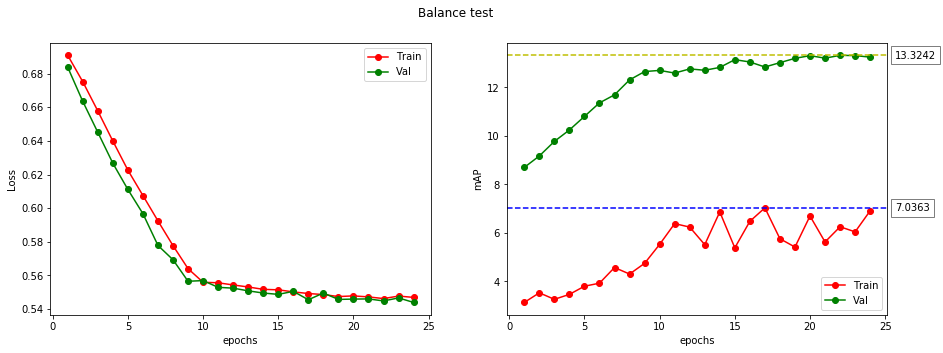

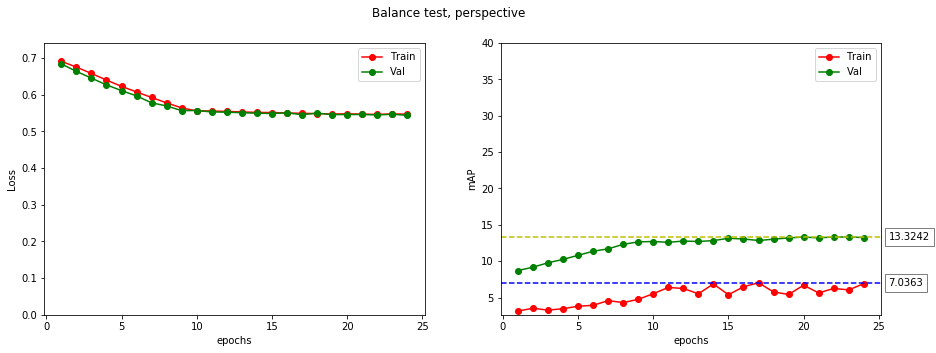

In [3]:
# Pre-trained weights, VM 1 GPU  (balance_labels.py?)
balance_test = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_train_balance_test.log'

print_metrics(balance_test, 'Balance test')
print_metrics(balance_test, 'Balance test, perspective', True)

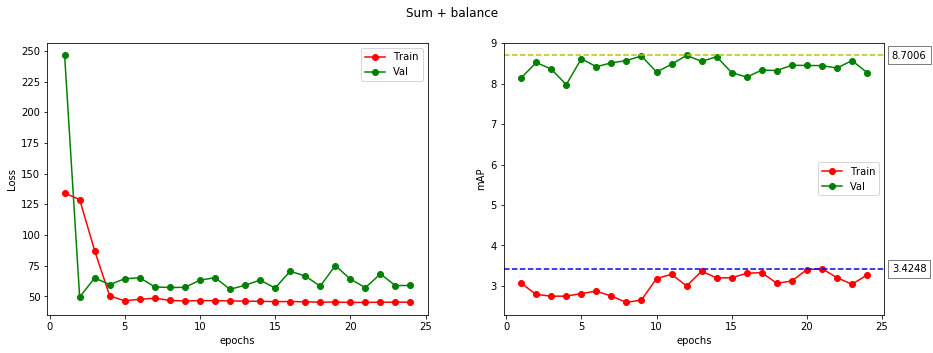

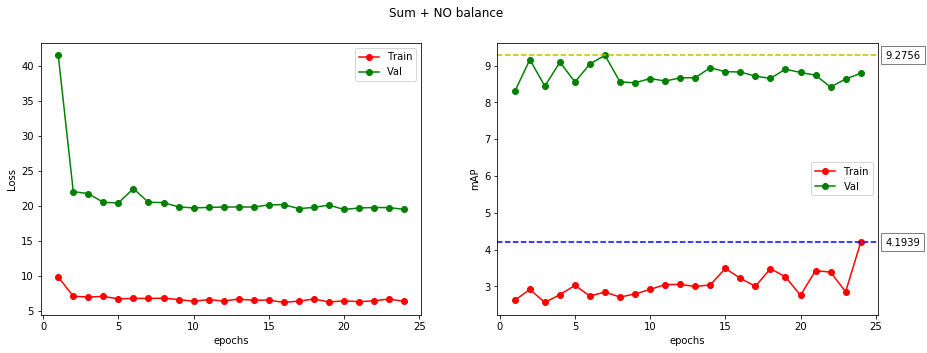

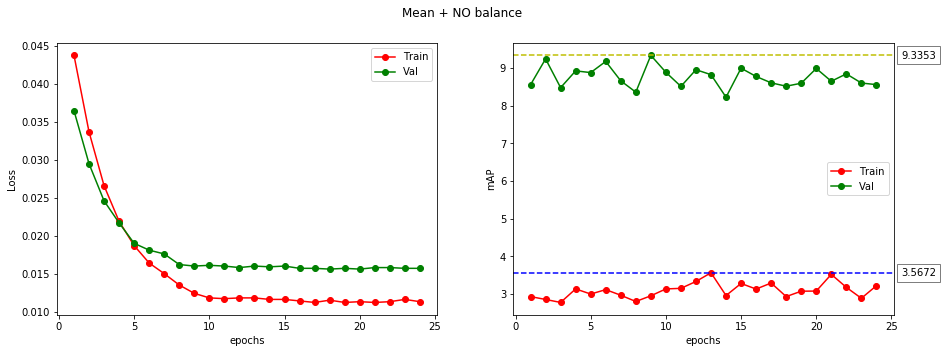

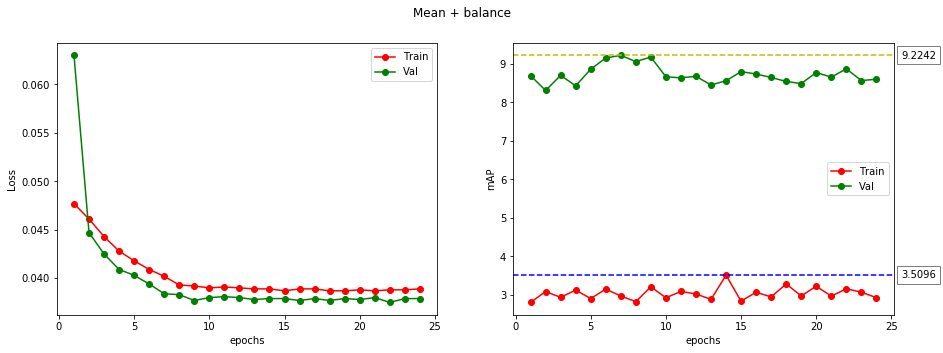

In [4]:
# From scratch + balance_labels.py

sum_balance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_sum_balance.log'
sum_nobalance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_sum_nobalance.log'
mean_nobalance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_nobalance.log'
mean_balance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_balance.log'

print_metrics(sum_balance, 'Sum + balance')
print_metrics(sum_nobalance, 'Sum + NO balance')
print_metrics(mean_nobalance, 'Mean + NO balance')
print_metrics(mean_balance, 'Mean + balance')

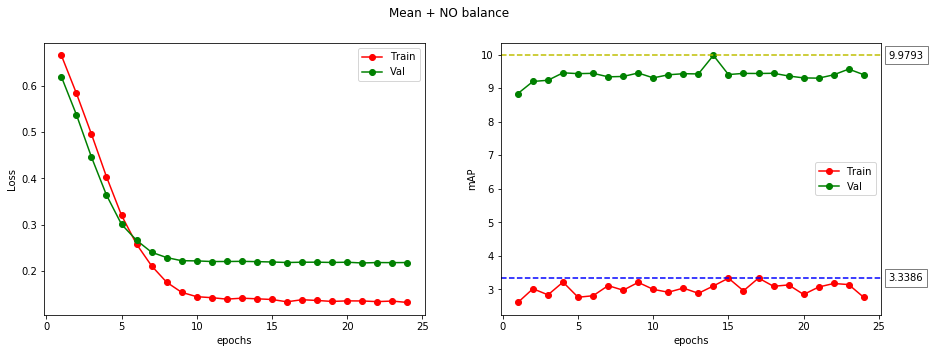

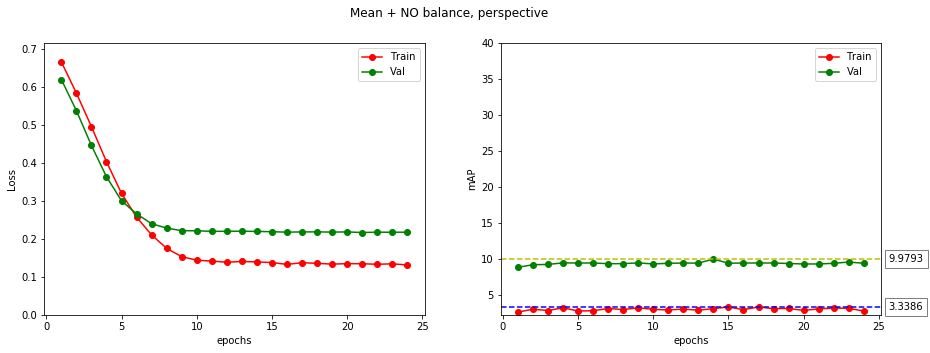

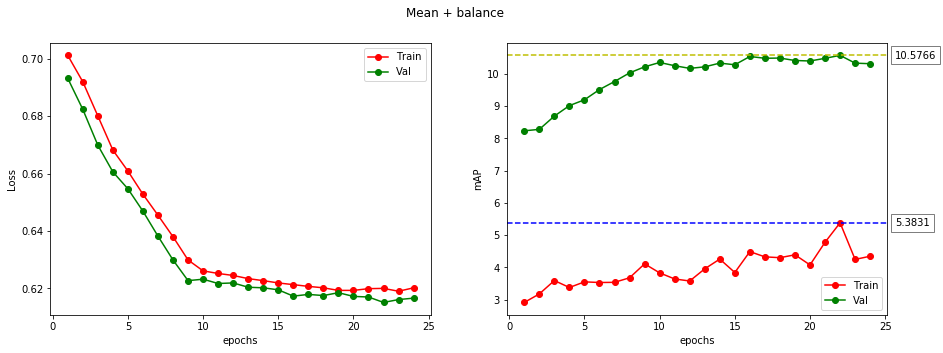

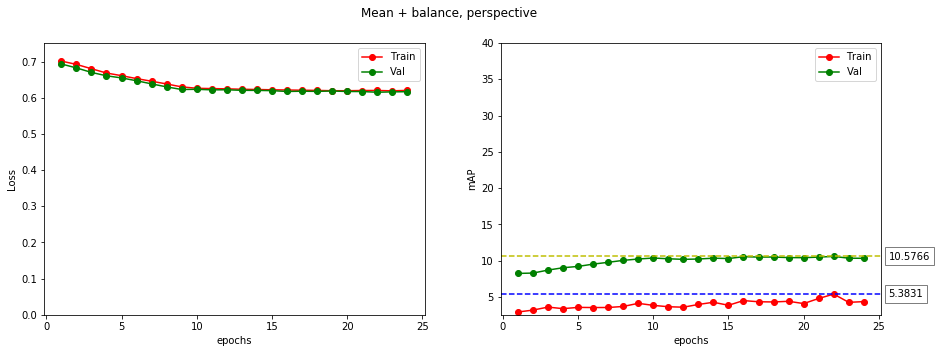

In [5]:
# Pre-trained weights (balance_labels.py)
mean_nobalance_w = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_nobalance_weights.log'
mean_balance_w = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_balance_weights.log'

print_metrics(mean_nobalance_w, 'Mean + NO balance')
print_metrics(mean_nobalance_w, 'Mean + NO balance, perspective', True)
print_metrics(mean_balance_w, 'Mean + balance')
print_metrics(mean_balance_w, 'Mean + balance, perspective', True)

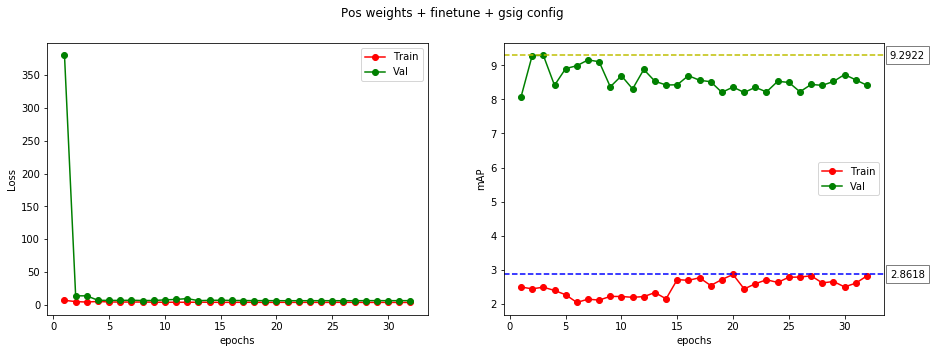

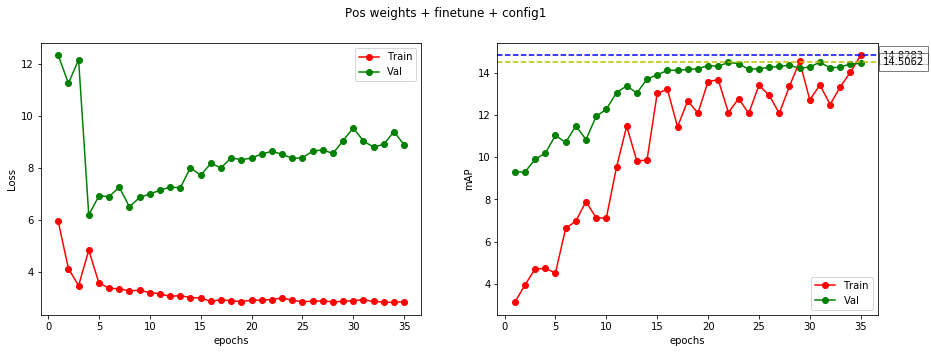

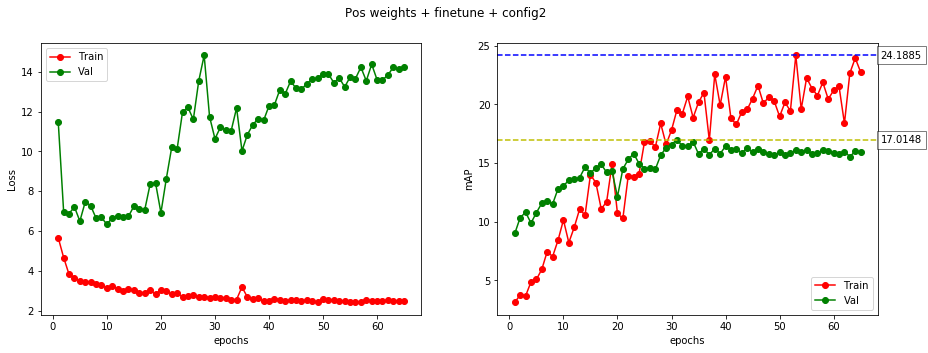

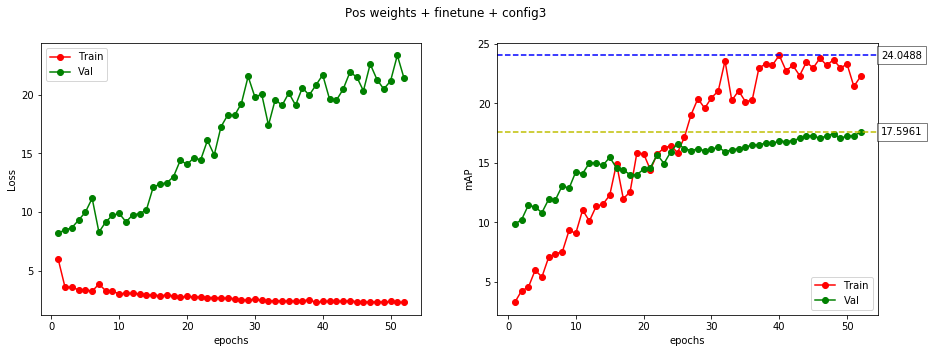

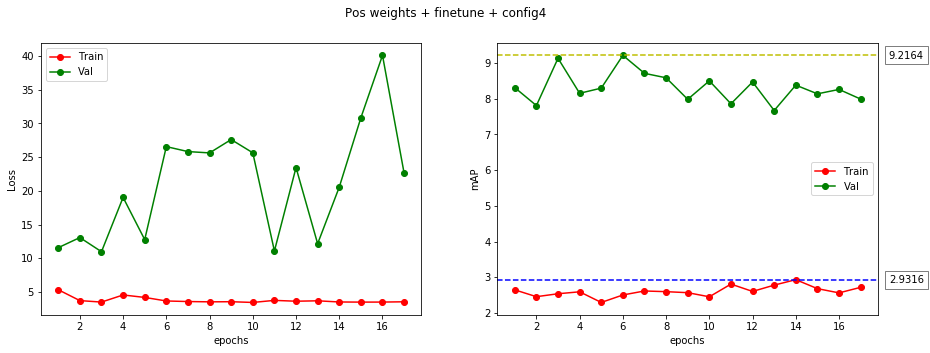

In [6]:
# AML, 2GPU, pre-trained, pyVideoResearch train config
full_newlr = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_full_newlr.log'
posw_gsig = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_pos_weights_gsig.log'
config1 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_config1.log'
config2 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_config2.log'
config3 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_config3.log'
config4 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_config4.log'

# print_metrics(full_newlr, 'Full data + new lr')
# print_metrics(full_newlr, 'Full data + new lr, perspective', True)
# print('/\ Validation with 10 clips!!!')

print_metrics(posw_gsig, 'Pos weights + finetune + gsig config')

print_metrics(config1, 'Pos weights + finetune + config1')

print_metrics(config2, 'Pos weights + finetune + config2')

print_metrics(config3, 'Pos weights + finetune + config3')

print_metrics(config4, 'Pos weights + finetune + config4')

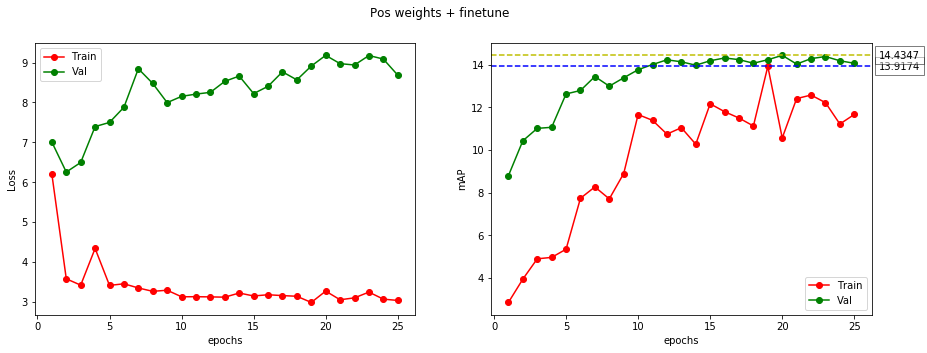

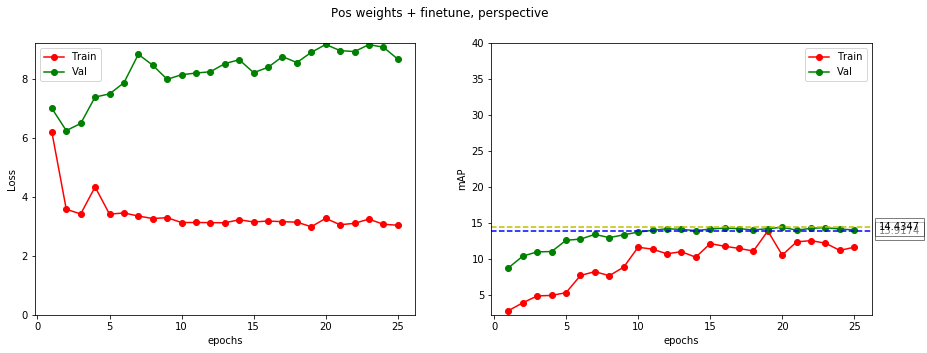

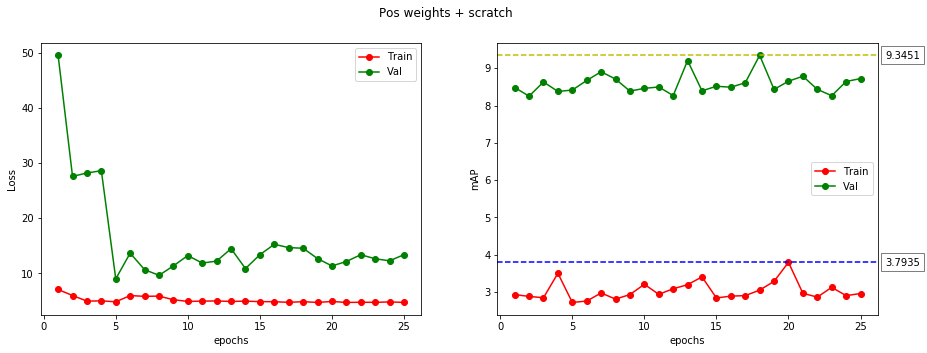

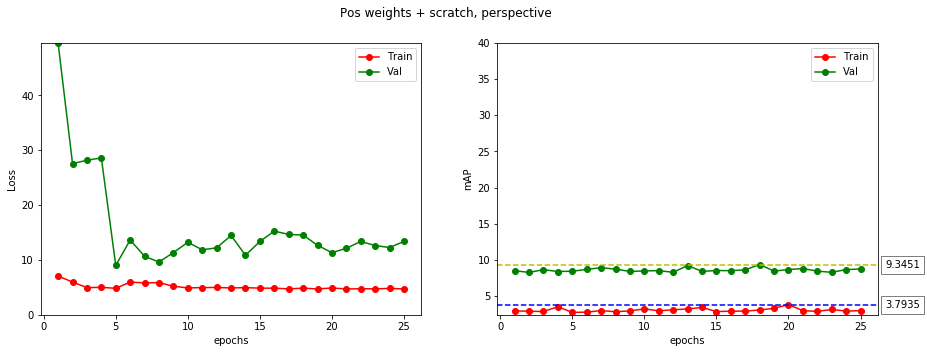

In [7]:
# AML, 2GPUs, using pos_weight 'correctly'
posw_finetune = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_pos_weights_finetune.log'
posw_scratch = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_pos_weights_scratch.log'

print_metrics(posw_finetune, 'Pos weights + finetune')
print_metrics(posw_finetune, 'Pos weights + finetune, perspective', True)

print_metrics(posw_scratch, 'Pos weights + scratch')
print_metrics(posw_scratch, 'Pos weights + scratch, perspective', True)


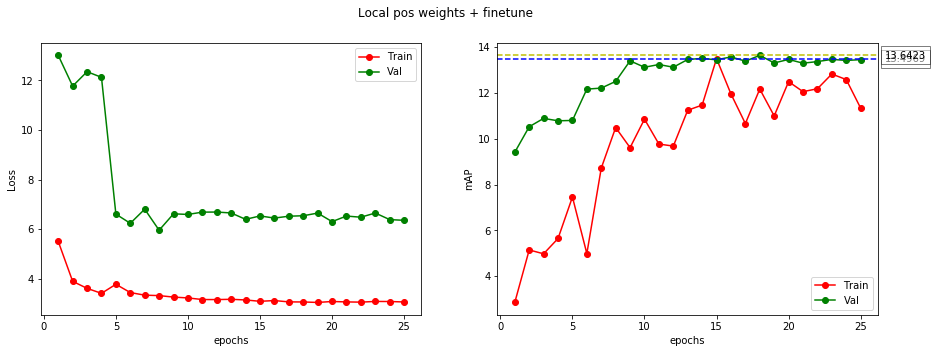

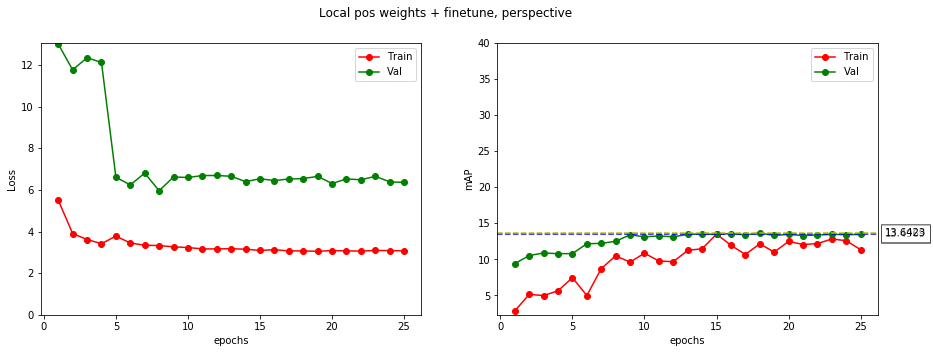

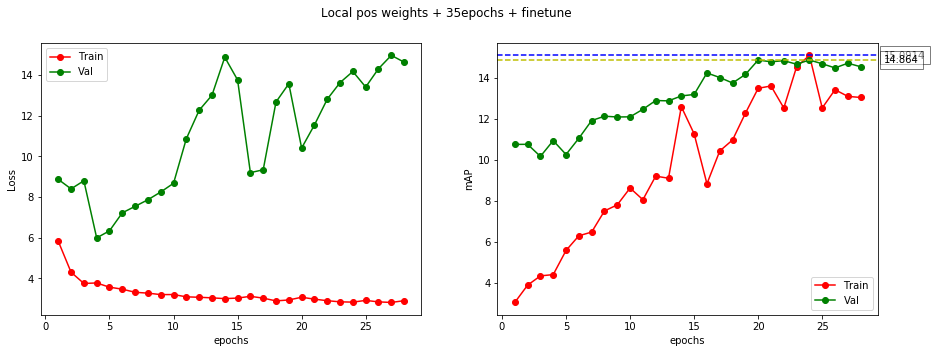

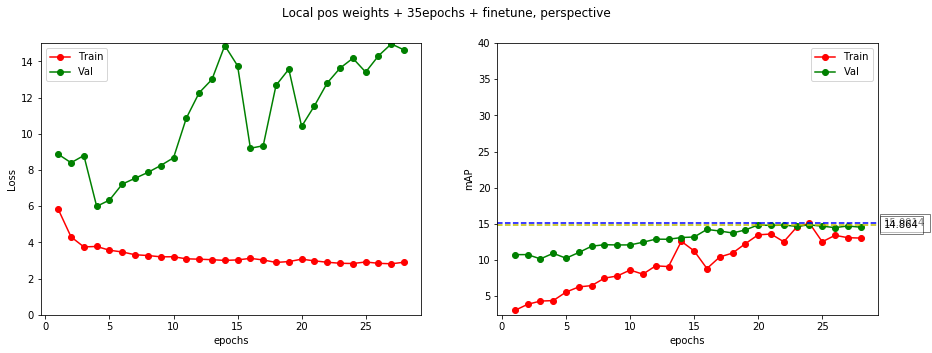

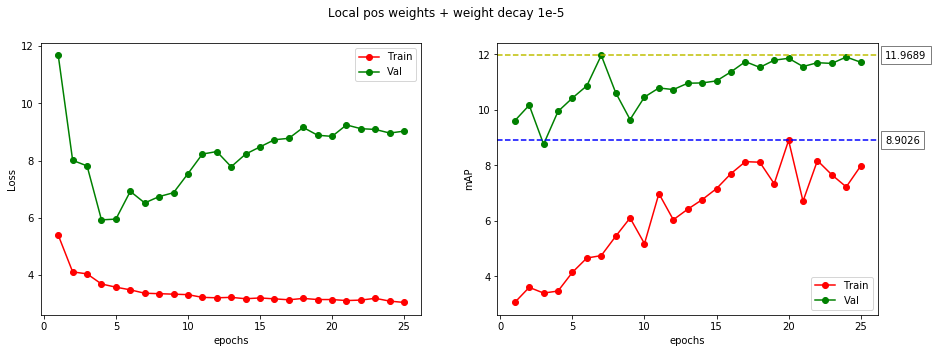

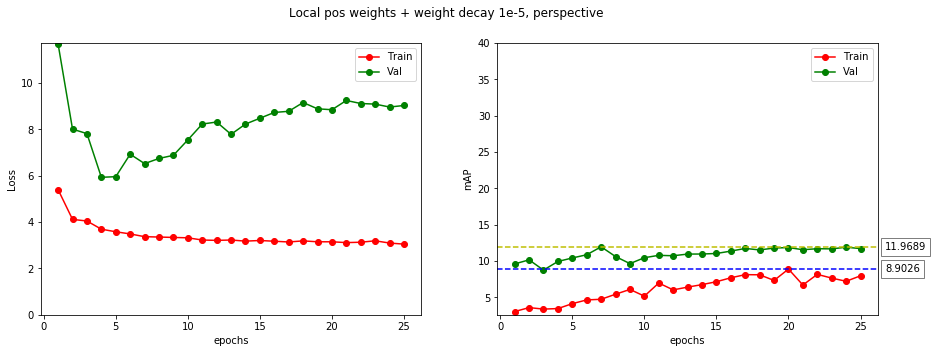

In [8]:
# Local, 1GPU, using pos_weight 'correctly'
pos_weigth = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_train_pos_weight.log'
weight_pos_weigth = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_train_35lr_pos_weight.log'
wd5 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_train_wd5.log'

print_metrics(pos_weigth, 'Local pos weights + finetune')
print_metrics(pos_weigth, 'Local pos weights + finetune, perspective', True)

print_metrics(weight_pos_weigth, 'Local pos weights + 35epochs + finetune')
print_metrics(weight_pos_weigth, 'Local pos weights + 35epochs + finetune, perspective', True)

print_metrics(wd5, 'Local pos weights + weight decay 1e-5')
print_metrics(wd5, 'Local pos weights + weight decay 1e-5, perspective', True)


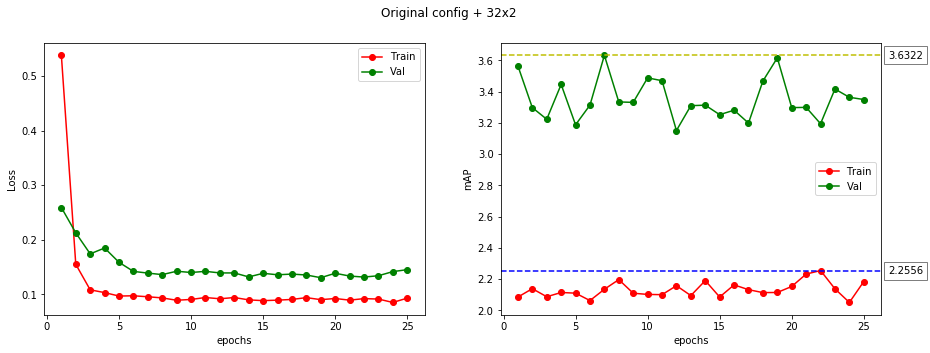

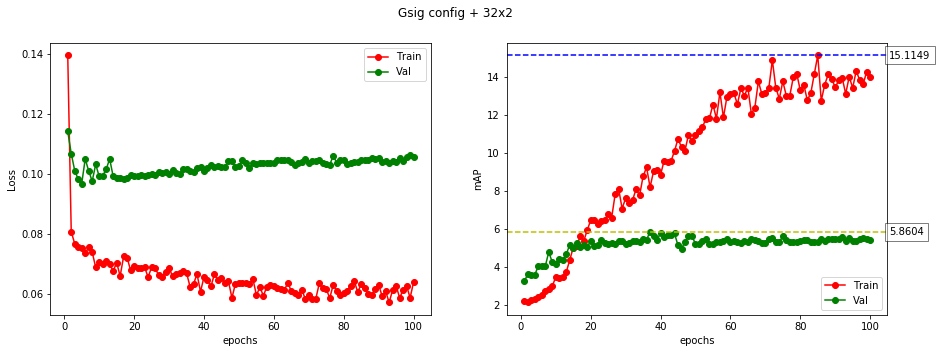

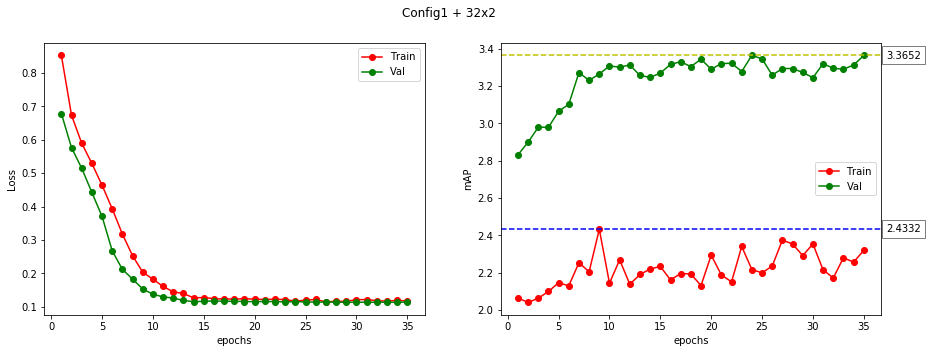

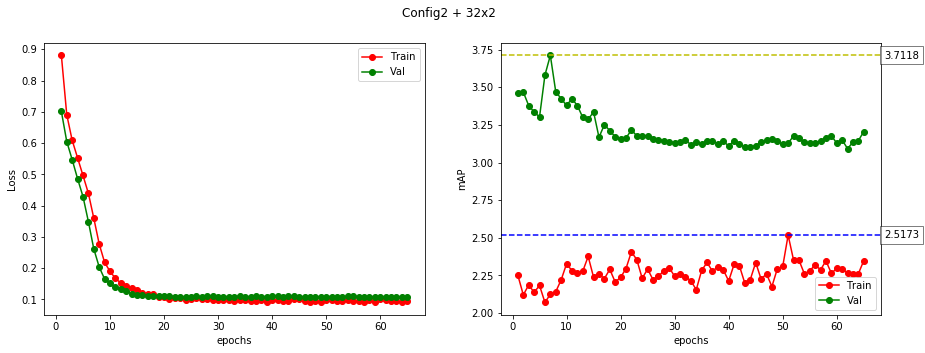

In [10]:
# V2 code (simpler transforms + 64 targets per video + conv3d as fc)..
# AML
original_32 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/v2/32x2_original_config.log'
gsig_32 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/v2/32x2_gsig_config.log'
config1_32 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/v2/32x2_config1.log'
config2_32 = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/v2/32x2_config2.log'

print_metrics(original_32, 'Original config + 32x2')
print_metrics(gsig_32, 'Gsig config + 32x2')
print_metrics(config1_32, 'Config1 + 32x2')
print_metrics(config2_32, 'Config2 + 32x2')